In [88]:
import pandas as pd
import numpy as np
import sqlalchemy as sql
from decouple import config

engine = sql.create_engine('mssql+pyodbc://IPSBD/Liquidacion?driver=ODBC+Driver+17+for+SQL+Server')
engine_plus = sql.create_engine('mssql+pyodbc://IPSBD\\Plus/Liquidacion?driver=ODBC+Driver+17+for+SQL+Server')
engine_Refuerzo = sql.create_engine('mssql+pyodbc://IPSBD\\PlusExtra/Liquidacion?driver=ODBC+Driver+17+for+SQL+Server')

liquidacion = config("LIQUIDACION")

In [89]:
cons_creditos = f"""SELECT L.PLLA, L.ORDEN, L.AFILIADO, SUM(MONTO) AS CREDITOS
FROM [{liquidacion}].dbo.Liquidacion L
INNER JOIN Codigos C ON C.CODIGO=L.CODIGO
WHERE C.TIPO='C'
--AND L.CODIGO NOT IN ('05','07','0Y')
GROUP BY L.PLLA, L.ORDEN, L.AFILIADO""".format(liquidacion)

creditos = pd.read_sql(cons_creditos, engine)
cons_beneficios = f"""SELECT D.CONTROL, D.PLLA, D.ORDEN, D.AFILIADO, DL.BENEFICIO, B.DETALLE AS BENEFICIO_TIPO,
R.DETALLE AS REPARTICION FROM DATOSAFILIADO D INNER JOIN BENEFICIO B ON B.COD=COD_BENEFICIO
INNER JOIN REPARTICION R ON R.COD=LETRA
INNER JOIN [{liquidacion}].dbo.DatosAfiliado DL on DL.CONTROL=D.CONTROL""".format(liquidacion=liquidacion)

beneficios = pd.read_sql(cons_beneficios, engine)
brutos = beneficios.merge(creditos, on=['PLLA', 'ORDEN', 'AFILIADO'], how='left').fillna(0.0)

brutos["BRUTO"] = brutos["BENEFICIO"] + brutos["CREDITOS"]

In [90]:

cons_creditos_plus = f"""SELECT L.PLLA, L.ORDEN, L.AFILIADO, SUM(MONTO) AS CREDITOS
FROM [{liquidacion}].dbo.Liquidacion L
INNER JOIN Codigos C ON C.CODIGO=L.CODIGO
WHERE C.TIPO='C'
GROUP BY L.PLLA, L.ORDEN, L.AFILIADO""".format(liquidacion)

creditos_plus = pd.read_sql(cons_creditos_plus, engine_plus)
cons_beneficios_plus = f"""SELECT D.CONTROL, D.PLLA, D.ORDEN, D.AFILIADO, DL.BENEFICIO, B.DETALLE AS BENEFICIO_TIPO,
R.DETALLE AS REPARTICION FROM DATOSAFILIADO D INNER JOIN BENEFICIO B ON B.COD=COD_BENEFICIO
INNER JOIN REPARTICION R ON R.COD=LETRA
INNER JOIN [{liquidacion}].dbo.DatosAfiliado DL on DL.CONTROL=D.CONTROL""".format(liquidacion=liquidacion)

beneficios_plus = pd.read_sql(cons_beneficios_plus, engine_plus)
brutos_plus = beneficios_plus.merge(creditos_plus, on=['PLLA', 'ORDEN', 'AFILIADO'], how='left').fillna(0.0)

brutos_plus["BRUTO"] = brutos_plus["BENEFICIO"] + brutos_plus["CREDITOS"]

In [91]:

cons_creditos_Refuerzo = f"""SELECT L.PLLA, L.ORDEN, L.AFILIADO, SUM(MONTO) AS CREDITOS
FROM [{liquidacion}].dbo.Liquidacion L
INNER JOIN Codigos C ON C.CODIGO=L.CODIGO
WHERE C.TIPO='C'
GROUP BY L.PLLA, L.ORDEN, L.AFILIADO""".format(liquidacion)

creditos_Refuerzo = pd.read_sql(cons_creditos_Refuerzo, engine_Refuerzo)
cons_beneficios_Refuerzo = f"""SELECT D.CONTROL, D.PLLA, D.ORDEN, D.AFILIADO, DL.BENEFICIO, B.DETALLE AS BENEFICIO_TIPO,
R.DETALLE AS REPARTICION FROM DATOSAFILIADO D INNER JOIN BENEFICIO B ON B.COD=COD_BENEFICIO
INNER JOIN REPARTICION R ON R.COD=LETRA
INNER JOIN [{liquidacion}].dbo.DatosAfiliado DL on DL.CONTROL=D.CONTROL""".format(liquidacion=liquidacion)

beneficios_Refuerzo = pd.read_sql(cons_beneficios_Refuerzo, engine_Refuerzo)
brutos_Refuerzo = beneficios_plus.merge(creditos_Refuerzo, on=['PLLA', 'ORDEN', 'AFILIADO'], how='left').fillna(0.0)

brutos_Refuerzo["BRUTO"] = brutos_Refuerzo["BENEFICIO"] + brutos_Refuerzo["CREDITOS"]

C:\Users\25030055\AppData\Local\Temp\ipykernel_33616\1197857336.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.boxplot(x="BRUTO", y="REPARTICION",


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

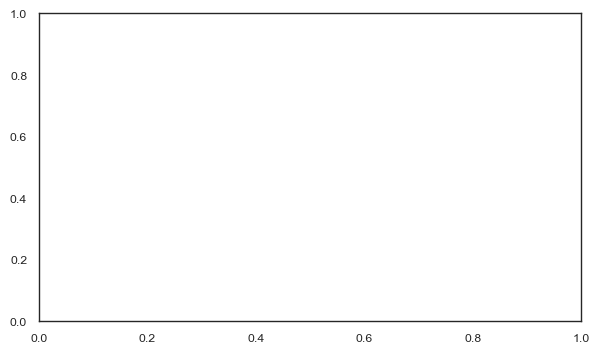

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(7, 4))

sns.color_palette("Spectral")

''' hacer una grafica con seaborn tipo boxplot del bruto por reparticion
ordenado de mayor a menor por mayores brutos y solo de las primeras 10 reparticiones
de mayor BRUTO, con las reparticiones en columnas de manera vertical '''

top_10_reparticiones = brutos.groupby("REPARTICION")["BRUTO"].sum().nlargest(10)

sns.boxplot(x="BRUTO", y="REPARTICION", 
data=brutos[brutos.isin(top_10_reparticiones)],
palette="vlag", hue="REPARTICION")

plt.show()

In [93]:
top_10_reparticiones.index.reset_index()

AttributeError: 'Index' object has no attribute 'reset_index'

In [ ]:
sum(costos)

23629233325.3646

In [ ]:
sum(costos)

23629233325.3646

In [ ]:
sum(costos)

23629233325.3646

In [ ]:
sum(costos)

23629233325.3646

In [ ]:
sum(costos)

23629233325.3646

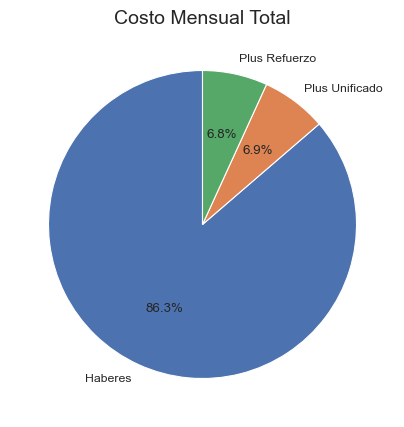

In [101]:
costos = [ brutos["BRUTO"].sum(), brutos_plus["BRUTO"].sum(), brutos_Refuerzo["BRUTO"].sum()]

sns.set_theme("paper")
sns.set_style("white")
fig = plt.figure(figsize=(5,5))
plt.pie(costos, autopct='%1.1f%%', shadow=False, startangle=90, labels=["Haberes", "Plus Unificado", "Plus Refuerzo"] )

plt.title("Costo Mensual Total", fontdict={'family': 'Arial', 'size': 14, 'style': 'normal'})

plt.show()



Text(0.5, 1.0, 'Costo Total de Haberes por Repartición')

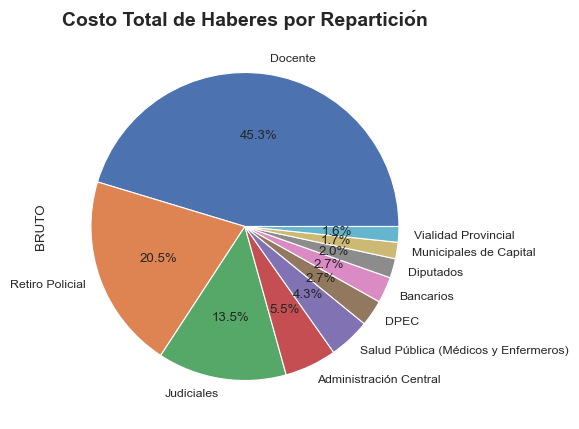

In [ ]:
p1 = brutos.groupby("REPARTICION")["BRUTO"].sum().sort_values(ascending=False)[:10].plot.pie(figsize=(5,5), autopct="%1.1f%%")

plt.title("Costo Total de Haberes por Repartición", fontdict={'family': 'Arial', 'size': 14, 'weight': 'bold', 'style': 'normal'})

In [ ]:
brutos.groupby("TIPO")["BRUTO"].sum().plot.bar(figsize=(5,5))

KeyError: 'TIPO'

In [ ]:
brutos.groupby("REPARTICION")["BRUTO"].
sum().sort_values(ascending=False)[:10].merge()

SyntaxError: incomplete input (4130912854.py, line 1)

In [109]:
 total_resto = sum(brutos.groupby("REPARTICION")["BRUTO"].sum().sort_values(ascending=False)[10:])
df as pd.DataFrame( )

SyntaxError: invalid syntax (3131056791.py, line 1)